# Text Clustering

In [1]:
!pip install Scrapy

In [2]:
!pip install pandas

In [3]:
!pip install requests

In [4]:
!pip install nltk

In [5]:
!pip install scikit-learn

In [6]:
!pip install matplotlib

In [7]:
!pip install seaborn

In [8]:
!pip install wordcloud

In [9]:
import numpy as np
#Library untuk Crawling
import scrapy

#Library untuk mengelola data dalam Dataframe
import pandas as pd

#Lbrary untuk Preprocessing
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize # tokenizing

#Untuk membuat vektor dan TFIDF
from sklearn import cluster
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Crawling Data

Data yang di crawling merupakan data abstrak tugas akhir trunojoyo pada ekonomi-manajemen https://pta.trunojoyo.ac.id/c_search/byprod/7 sebanyak 60 dokumen. Pengambilan data berupa link, judul, penulis, Dosen Pembimbing I, Dosen Pembimbing II, Abstrak.

### Buat Direktori Scrapy

Buat direktori baru dengan perintah<br>
scrapy startproject tutorial

### Crawl Link

Copy code berikut dan simpan dengan nama linkEkonomi.py

In [10]:
import scrapy

class Link(scrapy.Spider):
    name = "link"
    start_urls = []

    for i in range(1,13):
        start_urls.append('https://pta.trunojoyo.ac.id/c_search/byprod/7/'+str(i))

    def parse(self, response):
        for page in range(1,6):
            for jurnal in response.xpath('//*[@id="content_journal"]/ul/li['+str(page)+']'):
                yield {
                    'Link': jurnal.xpath('div[3]/a/@href').get()
                }

Running Code berikut pada terminal:<br>
scrapy runspider linkEkonomi.py -o linkEkonomi.json <br>
Maka nanti akan mendapatkan hasil crawl link dalam bentuk json, dan dikonversi ke CSV

In [11]:
#Membuat Dataframe
dataURL = pd.read_csv('https://raw.githubusercontent.com/RizkiAshPrat/Materi-PPW/main/linkEkonomi.csv')
dataURL

,Link
0,https://pta.trunojoyo.ac.id/welcome/detail/080...
1,https://pta.trunojoyo.ac.id/welcome/detail/090...
2,https://pta.trunojoyo.ac.id/welcome/detail/080...
3,https://pta.trunojoyo.ac.id/welcome/detail/100...
4,https://pta.trunojoyo.ac.id/welcome/detail/080...
5,https://pta.trunojoyo.ac.id/welcome/detail/090...
6,https://pta.trunojoyo.ac.id/welcome/detail/090...
7,https://pta.trunojoyo.ac.id/welcome/detail/080...
8,https://pta.trunojoyo.ac.id/welcome/detail/090...
9,https://pta.trunojoyo.ac.id/welcome/detail/060...


### Crawl Jurnal(Judul, Penulis, Dosen Pembimbing I, Dosen Pembimbing II, Abstrak)

Copy code berikut dan simpan dengan nama jurnalEkonomi.py

In [12]:
import scrapy
import json
import requests


class JurnalInfor(scrapy.Spider):
    name = "jurnal"
    
    file_json = requests.get("https://raw.githubusercontent.com/RizkiAshPrat/Materi-PPW/main/linkEkonomi.json")
    start_urls = json.loads(file_json.text)
    urls = []

    for i in range(len(start_urls)):
        b = start_urls[i]['Link']
        urls.append(b)
    
    def start_requests(self):
        for url in self.urls:
            yield scrapy.Request(url = url, callback = self.parse)

    def parse(self, response):
        for jurnal in response.xpath('//*[@id="content_journal"]/ul/li'):
            yield {
                'Judul': jurnal.xpath('div[2]/a/text()').get(),
                'Penulis': jurnal.xpath('div[2]/div[1]/span/text()').get().replace("Penulis : ",""),
                'Dosen Pembimbing I': jurnal.xpath('div[2]/div[2]/span/text()').get().replace("Dosen Pembimbing I : ",""),
                'Dosen Pembimbing II': jurnal.xpath('div[2]/div[3]/span/text()').get().replace("Dosen Pembimbing II :",""),
                'Abstrak': jurnal.xpath('div[4]/div[2]/p/text()').get()
            }

Running Code berikut pada terminal:<br>
scrapy runspider jurnalEkonomi.py -o jurnalEkonomi.json <br>
Maka nanti akan mendapatkan hasil crawl jurnal dalam bentuk json, dan dikonversi ke CSV

In [13]:
#Membuat Dataframe
dataAbstrak = pd.read_csv('https://raw.githubusercontent.com/RizkiAshPrat/Materi-PPW/main/jurnalEkonomi.csv')
dataAbstrak

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak
0,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,SATIYAH,"Dra. Hj. S. Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST.SE,M.MT",ABSTRAK\r\...
1,analisis faktor-faktor yang berpengaruh terhad...,Jailani,"Hj. Evaliati amaniyah, SE., M.SM","Purnamawati, SE., M.Si",ABSTRAK\r\nTujuan penelitian ini adalah untuk ...
2,PENGARUH GAYA KEPEMIMPINAN DEMOKRATIK TERHADAP...,Wahyu Kurniawan,"Dr. Dra. Hj. Iriani Ismail, MM","Dra. Hj. S. Anugrahini Irawati, MM",NaN
3,Pengaruh Harga dan Kualitas Pelayanan terhadap...,ALI RAHBINI,PRIBANUS WANTARA,NIRMA KURRIWATI,"Ali Rahbini, Pengaruh Harga dan Kualitas Pelay..."
4,ANALISIS PERSEPSI BRAND ASSOCIATION MENURUT PE...,Faishal,Nurita Andriani,Yustina Chrismardani,Tujuan penelitian ini adalah untuk mengetahui ...
5,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...
6,PENGARUH CELEBRITY ENDORSER IWAN FALS TERHADAP...,Tayyi Matun,Bambang Setiyo Pambudi,Yustina Chrismardani,Tujuan penelitian ini adalah mengetahui pengar...
7,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...
8,PENGARUH RETAILING MIX (BAURAN ECERAN) TERHADA...,Ali Usman,"Dr. Ir. Nurita Andriani, MM","Hadi Purnomo, SE., MM",Bauran eceran merupakan salah satu langkah pem...
9,ANALISIS CONSUMER DECISION MODEL (CDM) UNTUK M...,SYAIFUL ANWAR,"Dr. H. Pribanus Wantara,Drs, MM","Fathor AS, S.E.MM",ABSTRAK\r\n\r\nPenelitian ini bertujuan untuk ...


### Menggabungkan Dataframe Link dan Jurnal

Dari dataframe Link dan Jurnal digabungkan supaya di load menjadi satu dataframe, maka akan didapatkan data kesatuan berupa link, judul, penulis, dosen pembimbing I, dosen pembimbing II, dan abstrak.

In [14]:
#Menggabungkan dataURL dan dataAbstrak
dataJurnal = pd.concat([dataURL, dataAbstrak], axis=1)

#Menampilkan dataBerita
dataJurnal

,Link,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak
0,https://pta.trunojoyo.ac.id/welcome/detail/080...,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,SATIYAH,"Dra. Hj. S. Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST.SE,M.MT",ABSTRAK\r\...
1,https://pta.trunojoyo.ac.id/welcome/detail/090...,analisis faktor-faktor yang berpengaruh terhad...,Jailani,"Hj. Evaliati amaniyah, SE., M.SM","Purnamawati, SE., M.Si",ABSTRAK\r\nTujuan penelitian ini adalah untuk ...
2,https://pta.trunojoyo.ac.id/welcome/detail/080...,PENGARUH GAYA KEPEMIMPINAN DEMOKRATIK TERHADAP...,Wahyu Kurniawan,"Dr. Dra. Hj. Iriani Ismail, MM","Dra. Hj. S. Anugrahini Irawati, MM",NaN
3,https://pta.trunojoyo.ac.id/welcome/detail/100...,Pengaruh Harga dan Kualitas Pelayanan terhadap...,ALI RAHBINI,PRIBANUS WANTARA,NIRMA KURRIWATI,"Ali Rahbini, Pengaruh Harga dan Kualitas Pelay..."
4,https://pta.trunojoyo.ac.id/welcome/detail/080...,ANALISIS PERSEPSI BRAND ASSOCIATION MENURUT PE...,Faishal,Nurita Andriani,Yustina Chrismardani,Tujuan penelitian ini adalah untuk mengetahui ...
5,https://pta.trunojoyo.ac.id/welcome/detail/090...,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...
6,https://pta.trunojoyo.ac.id/welcome/detail/090...,PENGARUH CELEBRITY ENDORSER IWAN FALS TERHADAP...,Tayyi Matun,Bambang Setiyo Pambudi,Yustina Chrismardani,Tujuan penelitian ini adalah mengetahui pengar...
7,https://pta.trunojoyo.ac.id/welcome/detail/080...,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...
8,https://pta.trunojoyo.ac.id/welcome/detail/090...,PENGARUH RETAILING MIX (BAURAN ECERAN) TERHADA...,Ali Usman,"Dr. Ir. Nurita Andriani, MM","Hadi Purnomo, SE., MM",Bauran eceran merupakan salah satu langkah pem...
9,https://pta.trunojoyo.ac.id/welcome/detail/060...,ANALISIS CONSUMER DECISION MODEL (CDM) UNTUK M...,SYAIFUL ANWAR,"Dr. H. Pribanus Wantara,Drs, MM","Fathor AS, S.E.MM",ABSTRAK\r\n\r\nPenelitian ini bertujuan untuk ...


## Text-Preprocessing

Text Prepocessing yang dilakukan pada kali ini meliputi:
1. Case Folding
2. Tokenizing
3. StopWord

### Case Folding

Case Folding merupakan tahap untuk konversi text menjadi suatu bentuk yang standar. Pada tahap ini biasanya dipilih lowercase untuk membuat huruf kapital menjadi lowercase 

In [15]:
#Case Folding untuk membuat huruf menjadi non kapital
dataJurnal['Abstrak'] = dataJurnal['Abstrak'].str.lower()

#Menampilkan Hasil Casefolding pada kolom Abstrak
dataJurnal['Abstrak'] = dataJurnal['Abstrak'].astype(str)
dataJurnal['Abstrak'] = [x.replace(':',' ') for x in dataJurnal['Abstrak']]
dataJurnal['Abstrak']

0                                         abstrak\r\...
1     abstrak\r\ntujuan penelitian ini adalah untuk ...
2                                                   nan
3     ali rahbini, pengaruh harga dan kualitas pelay...
4     tujuan penelitian ini adalah untuk mengetahui ...
5     aplikasi nyata pemanfaatan teknologi informasi...
6     tujuan penelitian ini adalah mengetahui pengar...
7     abstrak\r\npenelitian ini menggunakan metode k...
8     bauran eceran merupakan salah satu langkah pem...
9     abstrak\r\n\r\npenelitian ini bertujuan untuk ...
10    abstrak\r\n\r\naththaariq, pengaruh kompetensi...
11    abstrak\r\nharyono arifin, pengaruh perilaku k...
12    abstrak\r\n\tdharma abidin syah,kesimpulan  (1...
13    hasil dari penelitian ini dari perhitungan cre...
14    abstrak\r\n\r\ntujuan penelitian ini adalah un...
15    abstrak\r\n\ttujuan penelitian ini adalah mend...
16    abstrak\r\n\r\npenelitian ini mengungkapkan be...
17    tujuan penelitian ini adalah untuk mengeta

### Tokenizing

Tokenizing merupakan tahap yang digunakan untuk melakukan pemecahan perkata pada fungsi word_tokenize() melalui Library NLTK. Selain itu pada tahap ini juga melakukan:
1. Menghapus Karakter Spesial<br>
   Pada fungsi remove_PTA_special(text), untuk menghapus karakter berupa tab, karakter non ASCII, mention, link, hastagh, dan URL yang tidak lengkap.
2. Menghapus Angka<br>
   Pada fungsi remove_number(text), untuk menghapus karakter berupa angka.
3. Menghapus Punctuation.<br>
   Menggunaan fungsi remove_punctuation() untuk mengganti sting.punctuation berupa (!"#$%&\’()*+,-./:;<=>?@[\\]^_`{|}~) dengan "".
4. Menghapus Ruang Kosong<br>
   Pada fungsi remove_whitespace_multiple()
5. Menghapus Karakter Single<br>
   Menggunakan fungsi remove_singl_char

In [16]:
#Untuk menghapus angka
import re

#Untuk menghilangkan Punctuation
import string

def remove_PTA_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(remove_PTA_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(remove_singl_char)

# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(word_tokenize_wrapper)
dataJurnal['Abstrak']

0     [abstrak, satiyah, pengaruh, faktorfaktor, pel...
1     [abstrak, tujuan, penelitian, ini, adalah, unt...
2                                                 [nan]
3     [ali, rahbini, pengaruh, harga, dan, kualitas,...
4     [tujuan, penelitian, ini, adalah, untuk, menge...
5     [aplikasi, nyata, pemanfaatan, teknologi, info...
6     [tujuan, penelitian, ini, adalah, mengetahui, ...
7     [abstrak, penelitian, ini, menggunakan, metode...
8     [bauran, eceran, merupakan, salah, satu, langk...
9     [abstrak, penelitian, ini, bertujuan, untuk, m...
10    [abstrak, aththaariq, pengaruh, kompetensi, do...
11    [abstrak, haryono, arifin, pengaruh, perilaku,...
12    [abstrak, dharma, abidin, syahkesimpulan, terd...
13    [hasil, dari, penelitian, ini, dari, perhitung...
14    [abstrak, tujuan, penelitian, ini, adalah, unt...
15    [abstrak, tujuan, penelitian, ini, adalah, men...
16    [abstrak, penelitian, ini, mengungkapkan, bebe...
17    [tujuan, penelitian, ini, adalah, untuk, m

### Stopword

Stopword bertujuan untuk mengambil kata-kata penting pada tokens yang dihasilkan oleh proses sebelumnya. Kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna disebut Stopword. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.<br>

Stopword yang digunakan menggunakan fungsi stopword_removal(words), sedangkan list stopword bahasa Indonesia diatur menggunakan Library NLTK pada stopwords.words('indonesian').

In [17]:
#Mendapatkan stopword indonesia
list_stopwords = stopwords.words('indonesian')

#Menghapus Stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
dataJurnal['Abstrak'] = dataJurnal['Abstrak'].apply(stopwords_removal)

dataJurnal['Abstrak']

0     [abstrak, satiyah, pengaruh, faktorfaktor, pel...
1     [abstrak, tujuan, penelitian, pengaruh, variab...
2                                                 [nan]
3     [ali, rahbini, pengaruh, harga, kualitas, pela...
4     [tujuan, penelitian, persepsi, brand, associat...
5     [aplikasi, nyata, pemanfaatan, teknologi, info...
6     [tujuan, penelitian, pengaruh, celebrity, endo...
7     [abstrak, penelitian, metode, kuantitatif, men...
8     [bauran, eceran, salah, langkah, pemasaran, ke...
9     [abstrak, penelitian, bertujuan, mengukur, efe...
10    [abstrak, aththaariq, pengaruh, kompetensi, do...
11    [abstrak, haryono, arifin, pengaruh, perilaku,...
12    [abstrak, dharma, abidin, syahkesimpulan, peng...
13    [hasil, penelitian, perhitungan, credit, risk,...
14    [abstrak, tujuan, penelitian, mengidentifikasi...
15    [abstrak, tujuan, penelitian, mendeskripsikan,...
16    [abstrak, penelitian, rumusan, pelaporan, biay...
17    [tujuan, penelitian, pengaruh, variabel, r

In [18]:
#simpan jadi csv
#Nama file : TextProcessingEkonomi.csv
dataJurnal.to_csv('TextPreprocessingEkonomi.csv')

## TF-IDF

TF-IDF (term frequency-inverse document frequency) adalah ukuran statistik yang mengevaluasi seberapa relevan sebuah kata dengan dokumen dalam kumpulan dokumen.<br>
TF-IDF untuk sebuah kata dalam dokumen dihitung dengan mengalikan dua metrik TF dan IDF.<br>
* TF(Term Frequency) : Istilah frekuensi kata dalam dokumen. Ada beberapa cara untuk menghitung frekuensi ini, dengan cara yang paling sederhana adalah dengan menghitung jumlah kata yang muncul dalam dokumen. Lalu, ada cara untuk menyesuaikan frekuensi, berdasarkan panjang dokumen, atau dengan frekuensi mentah kata yang paling sering muncul dalam dokumen.

$$
t f(t, d)=\log (1+\text { freq }(t, d))
$$ 
<br>
<b>Keterangan:</b><br>
t : Term<br>
d : document<br>


* IDF(Inverse Document Frequency): Ini berarti, seberapa umum atau jarang sebuah kata di seluruh kumpulan dokumen. Semakin dekat ke 0, semakin umum sebuah kata. Metrik ini dapat dihitung dengan mengambil jumlah total dokumen, membaginya dengan jumlah dokumen yang berisi kata, dan menghitung logaritma.

$$
i d f(t, D)=\log \left(\frac{N}{\operatorname{count}(d \in D: t \in d)}\right)
$$
<br>

<b>Keterangan:</b><br>
N : total dokumen<br>

$$ 
(d \in D: t \in d) = \mathrm{df}_{t} 
$$ 

dft : jumlah kemunculan term (tj) dalam dokumen<br>


Sehingga, untuk TF-IDF rumusnya adalah sebagai berikut :

$$
t f i d f(t, d, D)=t f(t, d), i d f(t, D)
$$

In [19]:
#Membuat Dataframe
dataTextPre = pd.read_csv('https://raw.githubusercontent.com/RizkiAshPrat/Materi-PPW/main/TextPreprocessingEkonomi.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['Abstrak'])

In [20]:
print(vectorizer.vocabulary_)

{'abstrak': 1, 'satiyah': 1013, 'pengaruh': 828, 'faktorfaktor': 302, 'pelatihan': 800, 'pengembangan': 830, 'produktivitas': 923, 'kerja': 484, 'dinas': 228, 'kelautan': 462, 'perikanan': 866, 'bangkalan': 77, 'dibawah': 211, 'bimbingan': 133, 'drahjsanugrahini': 263, 'irawatimm': 407, 'helmi': 359, 'buyung': 150, 'auliasstsemmt': 70, 'upaya': 1180, 'meningkatkan': 682, 'mudah': 726, 'salah': 1005, 'usaha': 1182, 'meningkat': 681, 'menerapkan': 657, 'program': 929, 'sumber': 1084, 'daya': 182, 'manusia': 613, 'sdm': 1015, 'dilaksanakan': 222, 'instansi': 392, 'tercapai': 1123, 'kemampuan': 467, 'pegawai': 791, 'efektif': 274, 'efisien': 278, 'pengembnagan': 831, 'diharapkan': 218, 'menyesuaikan': 694, 'kebutuhankebutuhan': 453, 'sikap': 1040, 'tingkah': 1146, 'laku': 567, 'keterampilan': 494, 'pengetahuan': 834, 'sesuai': 1030, 'tuntutan': 1167, 'perubahan': 884, 'mendukung': 651, 'terciptanya': 1124, 'suasana': 1081, 'kondusif': 529, 'produktivitasi': 924, 'tujuan': 1163, 'penelitian

### TF

In [21]:
matrik_vsm=bag.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(60, 1217)

In [22]:
matrik_vsm[0]

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
a=vectorizer.get_feature_names()

In [24]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

60


,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,administrasi,...,wilayah,wildansemsi,windows,wispandonosems,with,xl,xterhadap,yamaha,yustina,zscore
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [25]:
DataTFIDF = TfidfVectorizer()
TFIDF=DataTFIDF.fit_transform(dataTextPre['Abstrak']).toarray()
TFIDF=pd.DataFrame(TFIDF)
TFIDF

,0,1,2,3,4,5,6,7,8,9,...,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216
0,0.00000,0.019758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.029195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.044740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.056619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Memberikan Nama Feature Pada Kolom

In [26]:
#Mengambil kolom feature
tf_idf = pd.DataFrame(data = DataTFIDF.fit_transform(dataTextPre['Abstrak']).toarray(), columns=vectorizer.get_feature_names())
final_df = tf_idf
final_df

,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,administrasi,...,wilayah,wildansemsi,windows,wispandonosems,with,xl,xterhadap,yamaha,yustina,zscore
0,0.00000,0.019758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.029195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.044740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.056619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## K-Means

K-means clustering merupakan salah satu metode cluster analysis non hirarki yang berusaha untuk mempartisi objek yang ada kedalam satu atau lebih cluster atau kelompok objek berdasarkan karakteristiknya, sehingga objek yang mempunyai karakteristik yang sama dikelompokan dalam satu cluster yang sama dan objek yang mempunyai karakteristik yang berbeda dikelompokan kedalam cluster yang lain. Metode K-Means Clustering berusaha mengelompokkan data yang ada ke dalam beberapa kelompok, dimana data dalam satu kelompok mempunyai karakteristik yang sama satu sama lainnya dan mempunyai karakteristik yang berbeda dengan data yang ada di dalam kelompok yang lain.<br>
Rumus yang digunakan pada K-Means adalah Ecludean Distance:
$$
\operatorname{dist}(x, y)=\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}
$$<br>

Dimana:<br>
xi : Objek 1 (Data)<br>
yi : Objek 2 (Centroid)

### Memilih K Optimal
Dilakukan pengidentifikasian K optimal pada data TFIDF dan hasilnya dapat dilihat pada visualisasi matplotlib paling tinggi setelah k=1 adalah k=3, maka dipilih k=3.

Fit 1 clusters
Fit 3 clusters
Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters


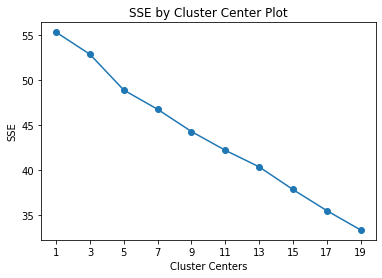

In [27]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(DataTFIDF.fit_transform(dataTextPre['Abstrak']), 20)

### Fungsi K-Means
Fungsi untuk melakukan proses K-Means dengan algoritma K maks, yaitu telah dipilih K=3 dan mengembalikan hasil Cluster setiap K-nya.

In [28]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [29]:
# Running Kmeans
k = 3
kmeans_results = run_KMeans(k, final_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

### Analisis Cluster

Menampilkan visualisasi kata yang paling banyak muncul dalam setiap clusternya, dengan K=3 yaitu terdapat 3 Cluster

In [30]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Kata paling banyak muncul Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

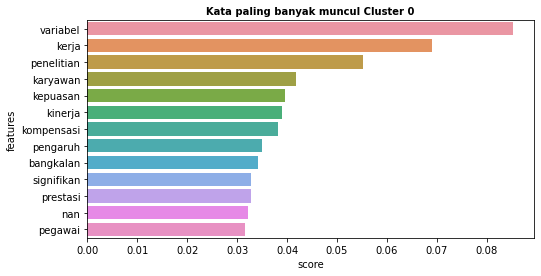

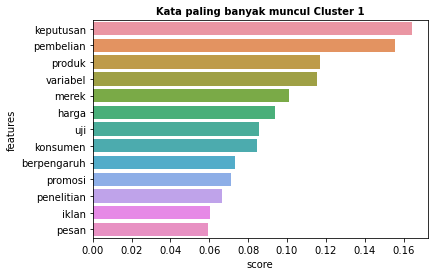

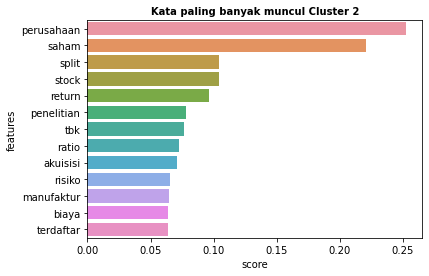

In [31]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

### Map of Words

Menampilkan Map Of Word dengan Cloud Word, Skor kata terbaik atau kata yang paling banyak muncul dari setiap Clusternya.

In [32]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

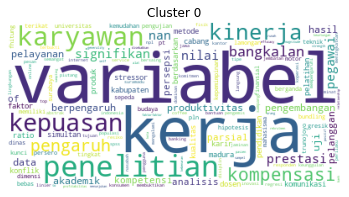

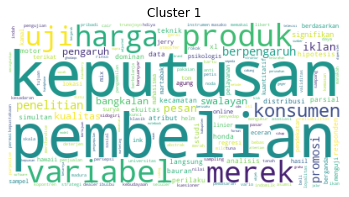

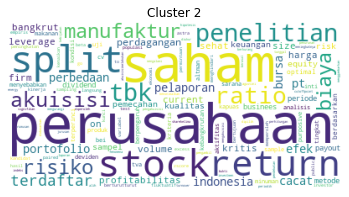

In [33]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

### Memberikan Label pada Setiap Dokumen

Setiap dokumen akan diberikan label berdasarkan hasil Clustering menggunakan metode K-Means

In [34]:
labels = kmeans.labels_ 
dataJurnal['Label'] = labels
dataJurnal

,Link,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label
0,https://pta.trunojoyo.ac.id/welcome/detail/080...,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,SATIYAH,"Dra. Hj. S. Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST.SE,M.MT","[abstrak, satiyah, pengaruh, faktorfaktor, pel...",0
1,https://pta.trunojoyo.ac.id/welcome/detail/090...,analisis faktor-faktor yang berpengaruh terhad...,Jailani,"Hj. Evaliati amaniyah, SE., M.SM","Purnamawati, SE., M.Si","[abstrak, tujuan, penelitian, pengaruh, variab...",2
2,https://pta.trunojoyo.ac.id/welcome/detail/080...,PENGARUH GAYA KEPEMIMPINAN DEMOKRATIK TERHADAP...,Wahyu Kurniawan,"Dr. Dra. Hj. Iriani Ismail, MM","Dra. Hj. S. Anugrahini Irawati, MM",[nan],0
3,https://pta.trunojoyo.ac.id/welcome/detail/100...,Pengaruh Harga dan Kualitas Pelayanan terhadap...,ALI RAHBINI,PRIBANUS WANTARA,NIRMA KURRIWATI,"[ali, rahbini, pengaruh, harga, kualitas, pela...",1
4,https://pta.trunojoyo.ac.id/welcome/detail/080...,ANALISIS PERSEPSI BRAND ASSOCIATION MENURUT PE...,Faishal,Nurita Andriani,Yustina Chrismardani,"[tujuan, penelitian, persepsi, brand, associat...",0
5,https://pta.trunojoyo.ac.id/welcome/detail/090...,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si","[aplikasi, nyata, pemanfaatan, teknologi, info...",0
6,https://pta.trunojoyo.ac.id/welcome/detail/090...,PENGARUH CELEBRITY ENDORSER IWAN FALS TERHADAP...,Tayyi Matun,Bambang Setiyo Pambudi,Yustina Chrismardani,"[tujuan, penelitian, pengaruh, celebrity, endo...",0
7,https://pta.trunojoyo.ac.id/welcome/detail/080...,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT","[abstrak, penelitian, metode, kuantitatif, men...",0
8,https://pta.trunojoyo.ac.id/welcome/detail/090...,PENGARUH RETAILING MIX (BAURAN ECERAN) TERHADA...,Ali Usman,"Dr. Ir. Nurita Andriani, MM","Hadi Purnomo, SE., MM","[bauran, eceran, salah, langkah, pemasaran, ke...",1
9,https://pta.trunojoyo.ac.id/welcome/detail/060...,ANALISIS CONSUMER DECISION MODEL (CDM) UNTUK M...,SYAIFUL ANWAR,"Dr. H. Pribanus Wantara,Drs, MM","Fathor AS, S.E.MM","[abstrak, penelitian, bertujuan, mengukur, efe...",1


In [36]:
#simpan jadi csv
#Nama file : dataJurnalEkonomiHasilCluster.csv
dataJurnal.to_csv('dataJurnalEkonomiHasilCluster.csv')